In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

### 2. Load & Inspect Data

In [3]:
df = pd.read_csv('../data/raw/Telco_Customer_Churn_Dataset  (3).csv')
print(df.shape)
print(df.columns)
display(df.head())
df.info()
print(df.isnull().sum())

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 3. Data Cleaning

In [4]:
duplicates = df.duplicated().sum()
print('Duplicate rows:', duplicates)
df = df.drop_duplicates()
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()
print('After cleaning:', df.shape)

Duplicate rows: 0
After cleaning: (7032, 21)


### 4. EDA: Churn Distribution

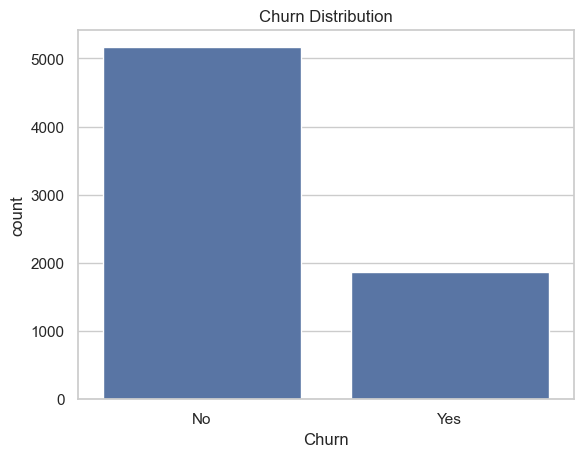

In [5]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

### 5. EDA: Tenure Distribution

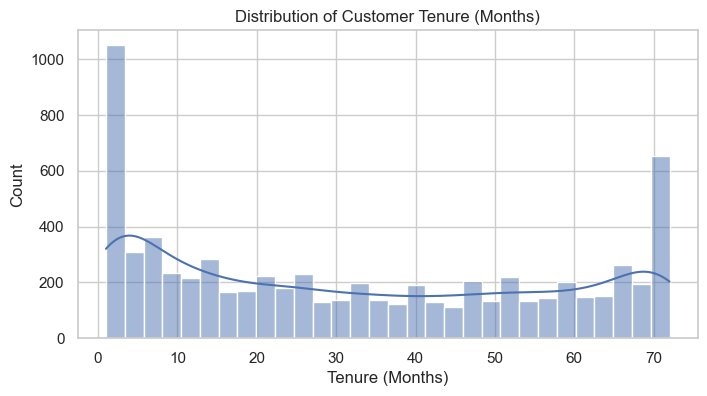

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

### 6. EDA: Monthly Charges by Churn

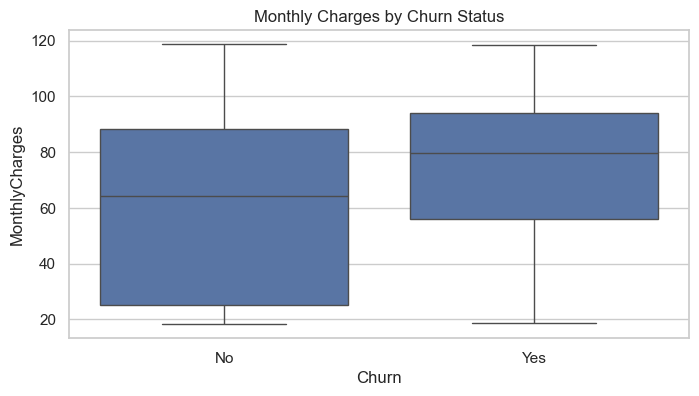

In [7]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

### 7. EDA: Gender Distribution

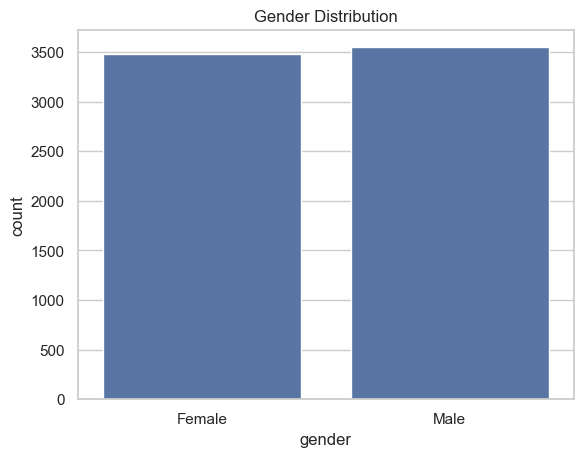

In [8]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

### 8. Statistical Summary

In [9]:
display(df.describe())
display(df.describe(include='object'))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### 9. Encode Categoricals & Split Data

In [10]:
from sklearn.model_selection import train_test_split
cat_cols = df.select_dtypes(include='object').columns.drop('customerID') if 'customerID' in df.columns else df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes
y = df['Churn']
X = df.drop(['Churn','customerID'], axis=1, errors='ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 10. EDA & Segmentation

churn rate: 0.26578498293515357


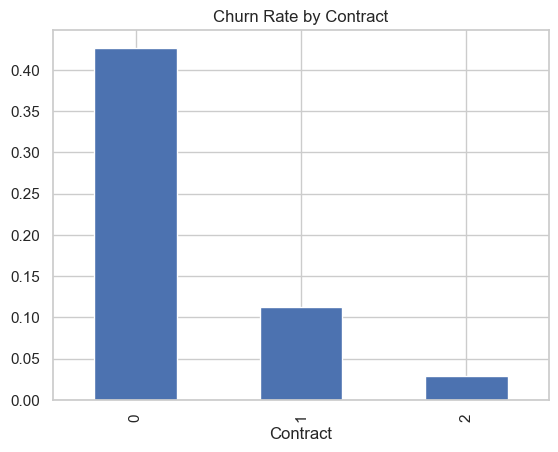

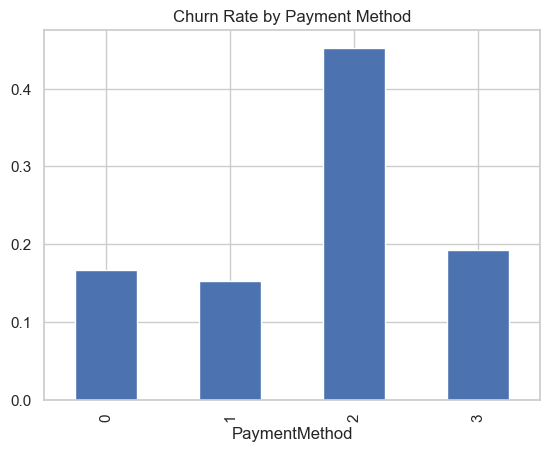

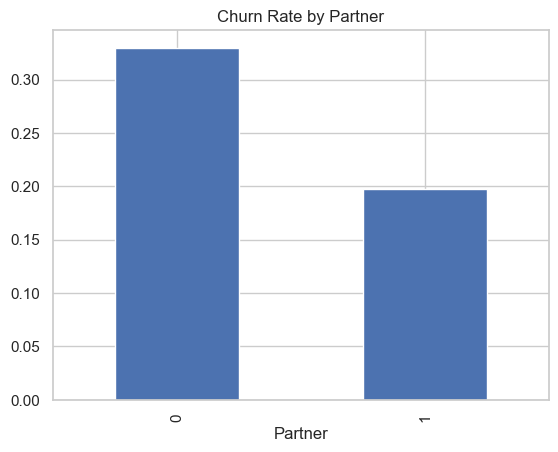

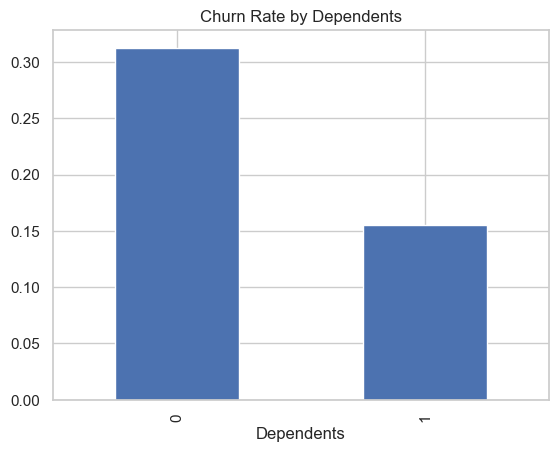

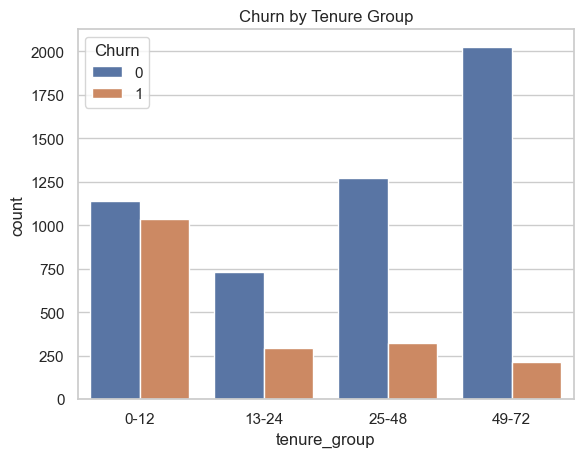

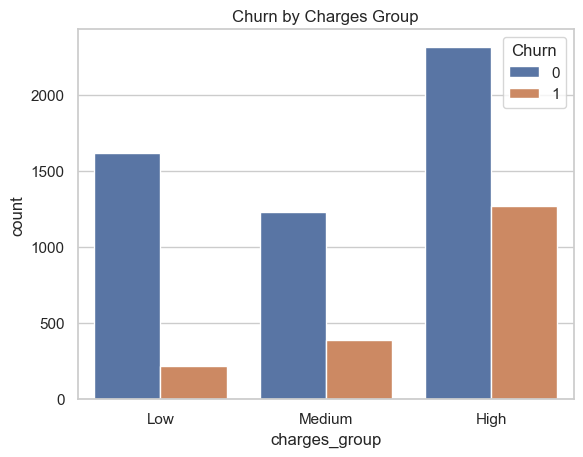

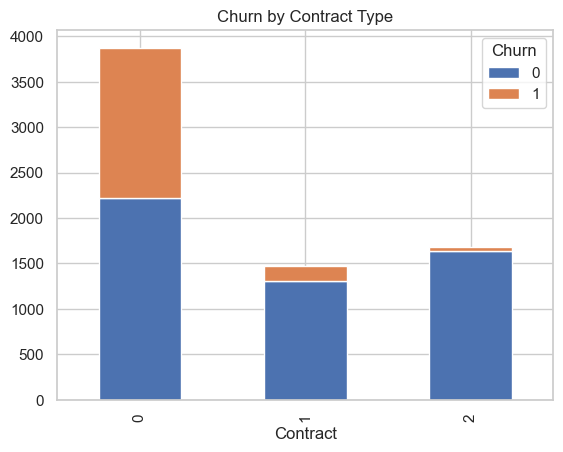

In [11]:
# Churn rate
churn_pct = df['Churn'].mean()
print('churn rate:', churn_pct)
# Churn by contract
df.groupby('Contract')['Churn'].mean().plot(kind='bar', title='Churn Rate by Contract')
plt.show()
# Churn by payment method
df.groupby('PaymentMethod')['Churn'].mean().plot(kind='bar', title='Churn Rate by Payment Method')
plt.show()
# Churn by partner
df.groupby('Partner')['Churn'].mean().plot(kind='bar', title='Churn Rate by Partner')
plt.show()
# Churn by dependents
df.groupby('Dependents')['Churn'].mean().plot(kind='bar', title='Churn Rate by Dependents')
plt.show()
# Segment by tenure
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels=['0-12','13-24','25-48','49-72'])
sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.show()
# Segment by charges
df['charges_group'] = pd.cut(df['MonthlyCharges'], bins=[0,40,70,120], labels=['Low','Medium','High'])
sns.countplot(x='charges_group', hue='Churn', data=df)
plt.title('Churn by Charges Group')
plt.show()
# Segment by contract
df.groupby(['Contract','Churn']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.show()

### 11. Save Processed Data
Save the cleaned, encoded dataset and train/test splits for reproducibility.

In [12]:
# Save cleaned, encoded full dataset
import os
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/processed_telco_churn.csv', index=False)
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)
print('Processed data and splits saved.')

Processed data and splits saved.


### 12. Modeling
Train and evaluate Logistic Regression and Decision Tree models.

In [13]:
# Logistic Regression & Decision Tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
print('Model Results:')
for name, metrics in results.items():
    print(f'{name}: {metrics}')

Model Results:
Logistic Regression: {'accuracy': 0.7860696517412935, 'precision': 0.622895622895623, 'recall': 0.4946524064171123, 'f1': 0.5514157973174366, 'roc_auc': np.float64(0.8307794648265008)}
Decision Tree: {'accuracy': 0.7249466950959488, 'precision': 0.4837905236907731, 'recall': 0.5187165775401069, 'f1': 0.5006451612903225, 'roc_auc': np.float64(0.657930020551739)}


c:\Users\N I T R O\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 13. Model Evaluation & Interpretation
Evaluate models with detailed metrics, ROC curves, and feature importance for a professional, portfolio-ready presentation.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407



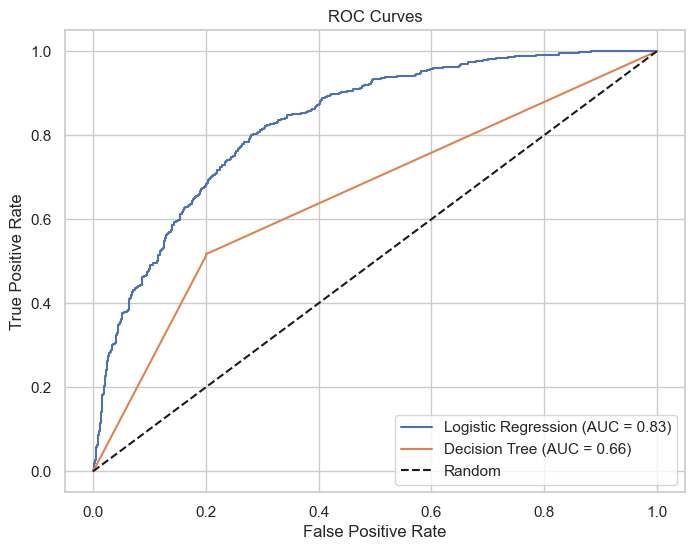

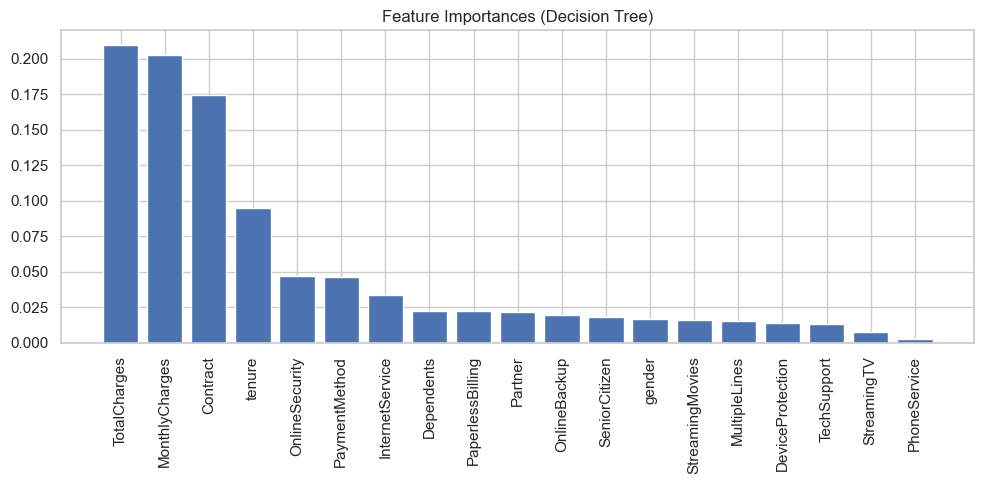

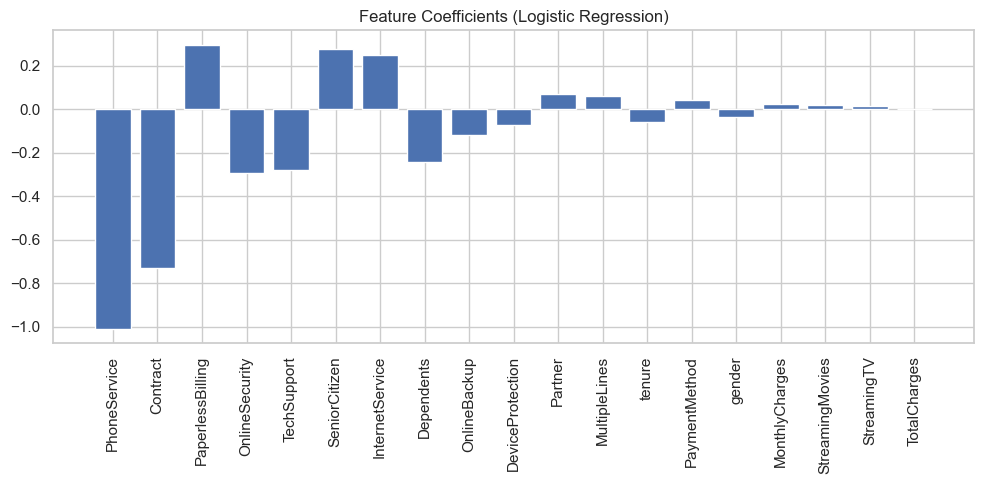

In [14]:
# Detailed evaluation: classification report, ROC curves, feature importance
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Print classification report for both models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))

# Plot ROC curves
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
plt.plot([0,1],[0,1],'k--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Feature importance for Decision Tree
dt_model = models['Decision Tree']
if hasattr(dt_model, 'feature_importances_'):
    importances = dt_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X_train.columns
    plt.figure(figsize=(10,5))
    plt.title('Feature Importances (Decision Tree)')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Feature importance for Logistic Regression
lr_model = models['Logistic Regression']
if hasattr(lr_model, 'coef_'):
    coefs = lr_model.coef_[0]
    indices = np.argsort(np.abs(coefs))[::-1]
    features = X_train.columns
    plt.figure(figsize=(10,5))
    plt.title('Feature Coefficients (Logistic Regression)')
    plt.bar(range(len(coefs)), coefs[indices], align='center')
    plt.xticks(range(len(coefs)), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()